In [5]:
import keras

In [6]:
from keras.datasets import mnist

In [3]:
from numpy import load

data = load('./data/mnist.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

x_test
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 

In [8]:
# Save loaded data to X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

In [9]:
# Shape of training data. X_train contains train images and y_train contains output labels for train images
print(X_train.shape)
print(y_train.shape)

# Shape of test data. X_test contains test images and y_test contains output labels for test images
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label for each of the above image: [5 0 4 1 9]


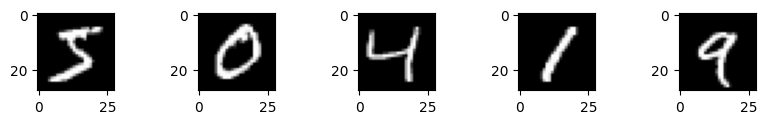

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(5):
    # Subplot will plot 5 images in 1 row.
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
print('label for each of the above image: %s' % (y_train[0:5]))

In [11]:
# Flatten the images
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [12]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [13]:
from tensorflow.keras.utils import to_categorical

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)

In [14]:
# Importing libraries needed for creating neural network,
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=28*28

# create model
model = Sequential()
# input layer
model.add(Dense(784, activation='relu',input_shape=(image_size,)))

# Hidden layer
model.add(Dense(128, activation='relu'))

# Softmax activation function is selected for multiclass classification
model.add(Dense(10, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_normalized, y_train_cat, validation_split=0.2, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
375/375 - 5s - 13ms/step - accuracy: 0.9280 - loss: 0.2458 - val_accuracy: 0.9626 - val_loss: 0.1243
Epoch 2/5
375/375 - 4s - 10ms/step - accuracy: 0.9725 - loss: 0.0896 - val_accuracy: 0.9716 - val_loss: 0.0880
Epoch 3/5
375/375 - 4s - 10ms/step - accuracy: 0.9831 - loss: 0.0540 - val_accuracy: 0.9759 - val_loss: 0.0823
Epoch 4/5
375/375 - 4s - 10ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9772 - val_loss: 0.0796
Epoch 5/5
375/375 - 4s - 9ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9772 - val_loss: 0.0788


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,151,632 (8.21 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,434,422 (5.47 MB)

In [17]:
from tensorflow.keras.callbacks import LambdaCallback
 # Define a callback function to print weights and biases at the end of each epoch
def print_weights_and_biases(epoch, logs):
    if epoch % 1 == 0:  # Print every epoch
        print(f"\nWeights and Biases at the end of Epoch {epoch}:")
        for layer in model.layers:
            print(f"Layer: {layer.name}")
            weights, biases = layer.get_weights()
            print(f"Weights:\n{weights}")
            print(f"Biases:\n{biases}")

# Create a LambdaCallback to call the print_weights_and_biases function
print_weights_callback = LambdaCallback(on_epoch_end=print_weights_and_biases)

In [18]:
model.fit(X_train_normalized, y_train_cat, validation_split=0.2, epochs=5, batch_size=128, verbose=2,callbacks=[print_weights_callback])


Epoch 1/5

Weights and Biases at the end of Epoch 0:
Layer: dense
Weights:
[[-0.01550589 -0.04465483  0.04214848 ... -0.05319259 -0.05397198
   0.04324035]
 [-0.01970394  0.05465012  0.03233379 ... -0.03238803 -0.03528181
  -0.02260917]
 [ 0.00442645 -0.05475605 -0.0050225  ... -0.04712426  0.00927101
   0.04089152]
 ...
 [ 0.03186813  0.05963377 -0.03685273 ...  0.04126479 -0.05599467
   0.04033683]
 [ 0.04015902 -0.04777438 -0.03841987 ...  0.01306434  0.00950671
   0.03213811]
 [ 0.0371062  -0.04926801 -0.06167844 ...  0.0250545   0.01862927
  -0.0505274 ]]
Biases:
[ 2.96467403e-03  7.94096291e-03  2.07944512e-02  1.90900620e-02
  1.20429276e-02 -5.10605285e-03 -2.05461793e-02  2.58219633e-02
  5.89417247e-03 -2.26417370e-03 -9.73073673e-03  1.42758256e-02
  1.01457220e-02 -4.66985302e-03 -3.25029250e-03 -7.33664609e-04
  4.61892039e-02 -1.88435819e-02  1.73257838e-03  1.75984651e-02
 -1.07577899e-02  4.55048727e-03  1.85820684e-02  2.03277189e-02
 -9.53301974e-03  1.23297665e-02  2

In [19]:
# predicting the model on test data
y_pred=model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
y_pred[0]

array([4.3837264e-11, 8.1310292e-11, 3.7194450e-09, 3.9783063e-07,
       3.7539856e-15, 1.4129097e-11, 1.0982557e-14, 9.9999946e-01,
       2.6791319e-10, 1.0329954e-07], dtype=float32)

In [22]:
import numpy as np
y_pred_final=[]
for i in y_pred:
    y_pred_final.append(np.argmax(i))

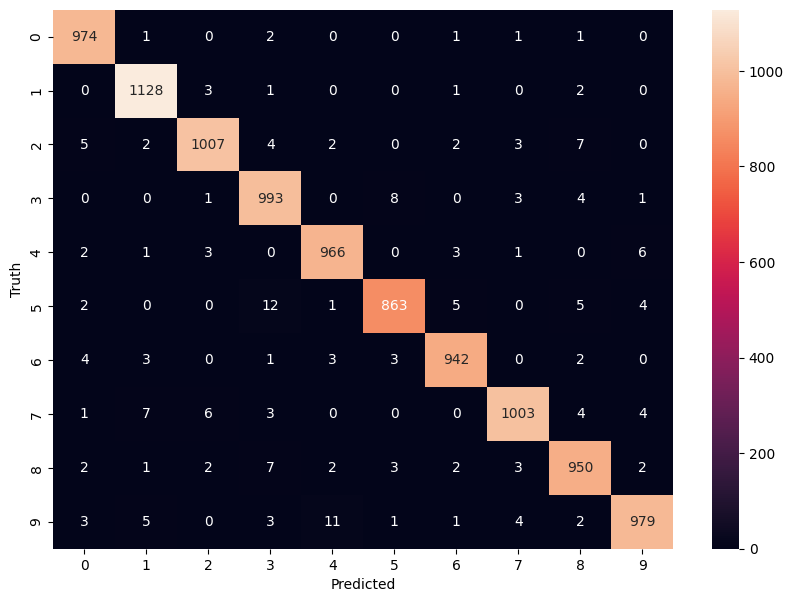

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

